In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import sympy as sy
from mpl_toolkits import mplot3d

In [2]:
%matplotlib notebook

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Andronov-Hopf bifurcation

In [4]:
#%matplotlib inline
def ah(alpha, X, Y):
    U = alpha*X - Y - X*(X**2+Y**2)
    V = X + alpha*Y - Y*(X**2+Y**2)
    return U, V

def task3_ah(alpha=(-5,5,0.1)):
    X, Y = np.meshgrid( np.arange(-2,2,0.1), np.arange(-2,2,0.1))
    U, V = ah(alpha, X, Y)
    plt.figure()
    plt.streamplot(X, Y, U, V)
    if (alpha > 0):
        plt.streamplot(X, Y, U, V, start_points=[(alpha,alpha)], maxlength=100, integration_direction='forward')
    plt.title(rf'$\alpha={alpha}$')
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
interact(task3_ah)

interactive(children=(FloatSlider(value=0.0, description='alpha', max=5.0, min=-5.0), Output()), _dom_classes=…

<function __main__.task3_ah(alpha=(-5, 5, 0.1))>

<IPython.core.display.Javascript object>


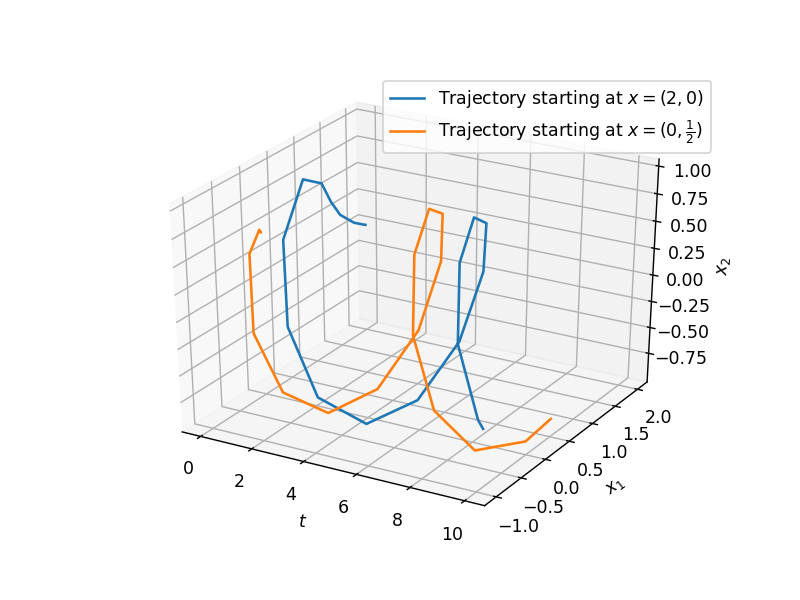

In [5]:
sol_ah_1 = scipy.integrate.solve_ivp(lambda t, x: ah(1., x[0], x[1]), (0, 10), [2., 0])
sol_ah_2 = scipy.integrate.solve_ivp(lambda t, x: ah(1., x[0], x[1]), (0, 10), [0, 0.5])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(sol_ah_1.t, sol_ah_1.y[0], sol_ah_1.y[1], label=r'Trajectory starting at $x=(2, 0)$')
ax.plot(sol_ah_2.t, sol_ah_2.y[0], sol_ah_2.y[1], label=r'Trajectory starting at $x=(0, \frac{1}{2})$')
plt.xlabel(r"$t$")
plt.ylabel(r"$x_1$")
ax.set_zlabel(r"$x_2$")
plt.legend();

## Cusp bifurcation

In [6]:
a1, a2 = np.meshgrid(np.linspace(-1, 1,1000), np.linspace(-1, 1,1000))

In [7]:
alpha1, alpha2, x = sy.symbols("alpha_1 alpha_2 x")

### Symbolic solution

In [8]:
exp_cusps = sy.solveset(alpha1+alpha2*x-x**3, x, domain=sy.S.Complexes)
print(exp_cusps.args)
exp_cusps

(-alpha_2/(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3) - (-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3, -alpha_2/((-1/2 - sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3, -alpha_2/((-1/2 + sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3)


FiniteSet(-alpha_2/(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3) - (-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3, -alpha_2/((-1/2 - sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3, -alpha_2/((-1/2 + sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-27*alpha_1/2 + sqrt(729*alpha_1**2 - 108*alpha_2**3)/2)**(1/3)/3)

### Evaluate over the domain using python functions

In [9]:
# doesn't work in the complex-valued regions
lam_cusps = [np.vectorize(lambda x,y:
                          complex(
                              sy.lambdify((alpha1, alpha2), exp_cusp, ['sympy'])
                                  (x,y)
                          ))       
             for exp_cusp in exp_cusps.args]

### Reimplement the symbolic solution to extract real-valued solution

In [10]:
def beta(alpha_1, alpha_2):
    return np.power(-27*alpha_1/2 + np.sqrt(729*alpha_1**2 - 108*alpha_2**3,dtype=complex)/2,1/3)

def cuspx01(alpha_1, alpha_2):
    return -alpha_2/beta(alpha_1, alpha_2) - beta(alpha_1, alpha_2)/3

def cuspx02(alpha_1, alpha_2):
    I = 1j
    return  -alpha_2/((-1/2 - np.sqrt(3)*I/2)*beta(alpha_1, alpha_2)) - (-1/2 - np.sqrt(3)*I/2)*beta(alpha_1, alpha_2)/3

def cuspx03(alpha_1, alpha_2):
    I = 1j
    return  -alpha_2/((-1/2 + np.sqrt(3)*I/2)*beta(alpha_1, alpha_2)) - (-1/2 + np.sqrt(3)*I/2)*beta(alpha_1, alpha_2)/3

### Plot real solution

<IPython.core.display.Javascript object>


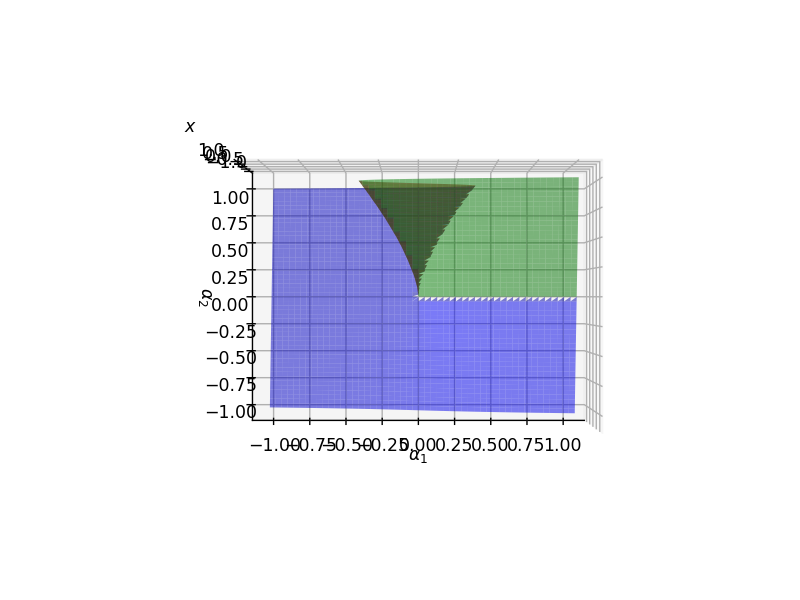

Text(0.5, 0, '$x$')

In [11]:
%matplotlib notebook
def real_only(arr):
    mask = np.abs(np.imag(arr)) > 0.001
    arr[mask] = np.nan
    return arr

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot_surface(a1,a2, real_only(cuspx01(a1,a2)), alpha=0.5, color='b')
ax.plot_surface(a1,a2, real_only(cuspx02(a1,a2)), alpha=0.5, color='r')
ax.plot_surface(a1,a2, real_only(cuspx03(a1,a2)), alpha=0.5, color='g')
ax.view_init(elev=89.999, azim=-90.001)
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")

### Plot phase diagrams

In [12]:
def cusp_norm_form(alpha_1=(-0.5,.5,0.01), alpha_2=0.5):
    X, Y = np.meshgrid( np.arange(-1,1,0.01), np.arange(-0.5,0.5,0.01))
    U = alpha_1+alpha_2*X-X**3
    V = -Y
    plt.figure()
    plt.streamplot(X, Y, U, V, density=3)
    plt.scatter(real_only(cuspx01(np.array([alpha_1]), np.array([alpha_2]))), 0, facecolor='none', edgecolor='b', s=100)
    plt.scatter(real_only(cuspx02(np.array([alpha_1]), np.array([alpha_2]))), 0, marker='+', color='r', s=100)
    plt.scatter(real_only(cuspx03(np.array([alpha_1]), np.array([alpha_2]))), 0, marker='x', color='g', s=100)
    plt.title(rf'$\alpha_1={alpha_1}$ $\alpha_2={alpha_2}$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$x_2=-\dot x_2$')

interact(cusp_norm_form)

interactive(children=(FloatSlider(value=0.0, description='alpha_1', max=0.5, min=-0.5, step=0.01), FloatSlider…

<function __main__.cusp_norm_form(alpha_1=(-0.5, 0.5, 0.01), alpha_2=0.5)>

### Plot complex solution

<IPython.core.display.Javascript object>


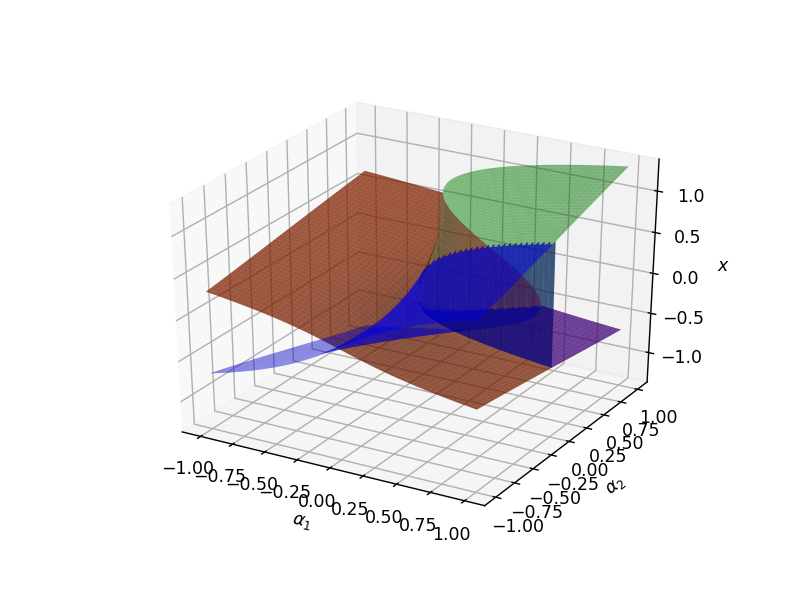

Text(0.5, 0, '$x$')

In [13]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a1,a2,cuspx01(a1,a2), alpha=0.5, color='b')
ax.plot_surface(a1,a2,cuspx02(a1,a2), alpha=0.5, color='r')
ax.plot_surface(a1,a2,cuspx03(a1,a2), alpha=0.5, color='g')
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")


<IPython.core.display.Javascript object>


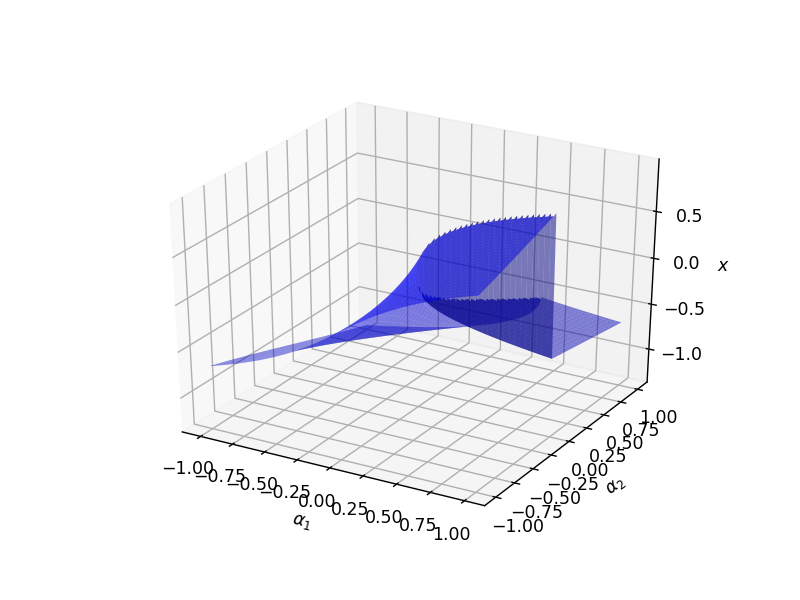

<IPython.core.display.Javascript object>


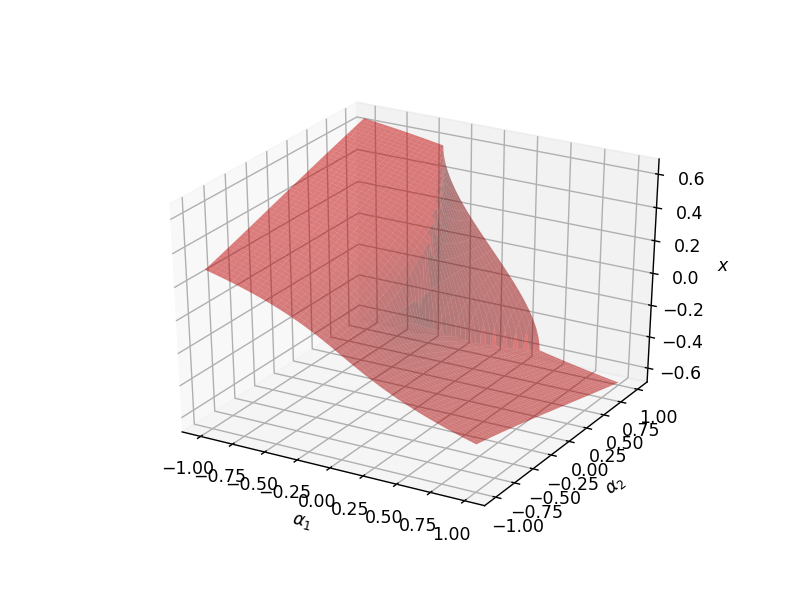

<IPython.core.display.Javascript object>


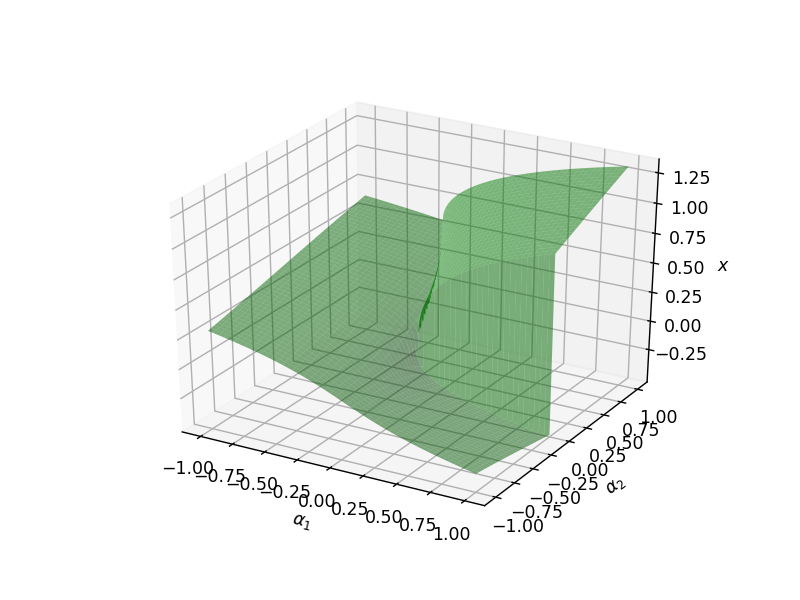

Text(0.5, 0, '$x$')

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a1,a2,cuspx01(a1,a2), alpha=0.5, color='b')
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a1,a2,cuspx02(a1,a2), alpha=0.5, color='r')
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(a1,a2,cuspx03(a1,a2), alpha=0.5, color='g')
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
ax.set_zlabel(r"$x$")